In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy
from scipy.cluster import hierarchy

import sklearn

In [4]:
from sklearn import datasets

iris = datasets.load_iris()
X, Y = iris.data, iris.target

print("Dataset Features : ", iris.feature_names)
print("Dataset Target : ", iris.target_names)
print('Dataset Size : ', X.shape, Y.shape)

Dataset Features :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Dataset Target :  ['setosa' 'versicolor' 'virginica']
Dataset Size :  (150, 4) (150,)


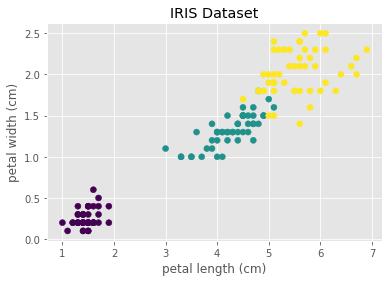

In [6]:
with plt.style.context("ggplot"):
    plt.scatter(X[:,2], X[:, 3], c=Y)
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.title("IRIS Dataset")
plt.savefig("IRIS Dataset.png", transparent=True)

In [4]:
clusters = hierarchy.linkage(X, method="complete")

clusters[:100]

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+00, 3.80000000e+01, 1.41421356e-01, 2.00000000e+00],
       [3.00000000e+00, 4.70000000e+01, 1.41421356e

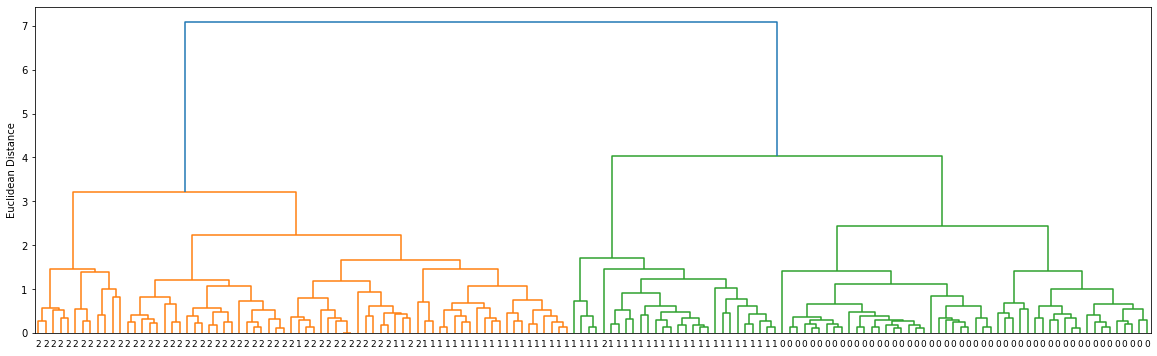

In [6]:
def plot_dendrogram(clusters):
    plt.figure(figsize=(20,6))
    dendrogram = hierarchy.dendrogram(clusters, labels=Y, orientation="top",leaf_font_size=9, leaf_rotation=360)
    plt.ylabel('Euclidean Distance');

plot_dendrogram(clusters)
plt.savefig("IRIS dendrogram.png", transparent=True)

In [10]:
def plot_actual_prediction_iris(X, Y, Y_preds):
    with plt.style.context(("ggplot", "seaborn")):
        plt.figure(figsize=(17,6))

        plt.subplot(1,2,1)
        plt.scatter(X[Y==0,2],X[Y==0,3], c = 'red', marker="^", s=50)
        plt.scatter(X[Y==1,2],X[Y==1,3], c = 'green', marker="^", s=50)
        plt.scatter(X[Y==2,2],X[Y==2,3], c = 'blue', marker="^", s=50)
        plt.title("Original Data")

        plt.subplot(1,2,2)
        plt.scatter(X[Y_preds==0,2],X[Y_preds==0,3], c = 'red', marker="^", s=50)
        plt.scatter(X[Y_preds==1,2],X[Y_preds==1,3], c = 'green', marker="^", s=50)
        plt.scatter(X[Y_preds==2,2],X[Y_preds==2,3], c = 'blue', marker="^", s=50)

        plt.title("Clustering Algorithm Prediction");



In [8]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.75, min_samples=2)
Y_preds = model.fit(X)

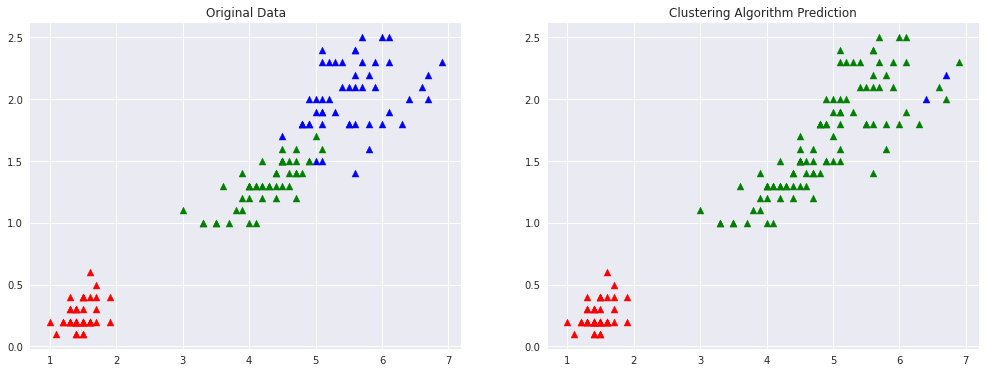

In [9]:
plot_actual_prediction_iris(X, Y, Y_preds.labels_)

In [10]:
Y_preds.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

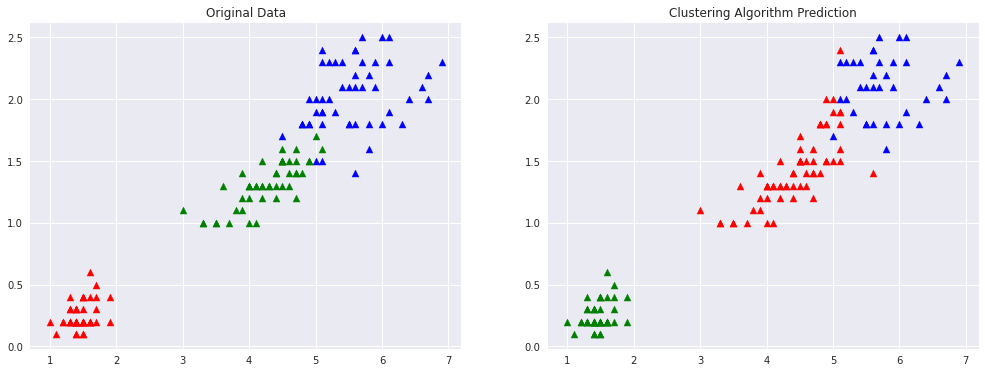

In [8]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3)
Y_preds = model.fit(X)
plot_actual_prediction_iris(X, Y, Y_preds.labels_)
plt.savefig("IRIS Algorithm.png", transparent=True)